<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Признаки по условию проекта:

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак:

- `Exited` — факт ухода клиента

Видим, что по какой-то причине есть отсутствие строк в столбце "Tenure" и тип float, хоть и написаны целые числа исключительно. Непонятно по какой причине эти пропуски, вероятнее всего, когда записывали 0, где-то это забывали делать или же специально не писали, ну новый же клиент, поэтому 1 год будет потом поменяем. Поэтому заменим 0

In [6]:
data['Tenure'] = data['Tenure'].fillna(0).astype('int64')

In [7]:
data.isnull().sum() #пропусков больше нет

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data['Tenure'] #тип изменен на целый

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     0
Name: Tenure, Length: 10000, dtype: int64

Также мы можем убрать некотрыйе столбцы, которые не несут никакой ценности в наших данных. Например, индекс строк, он получается дублированным, можем убрать имена, так как мы будем переводить все в горячее кодировыание, а у каждого человека и так есть порядковый id номер.

In [9]:
data.duplicated().sum()

0

Дубликатов нет

In [10]:
data.drop(['Surname', 'RowNumber'], axis=1, inplace=True, )

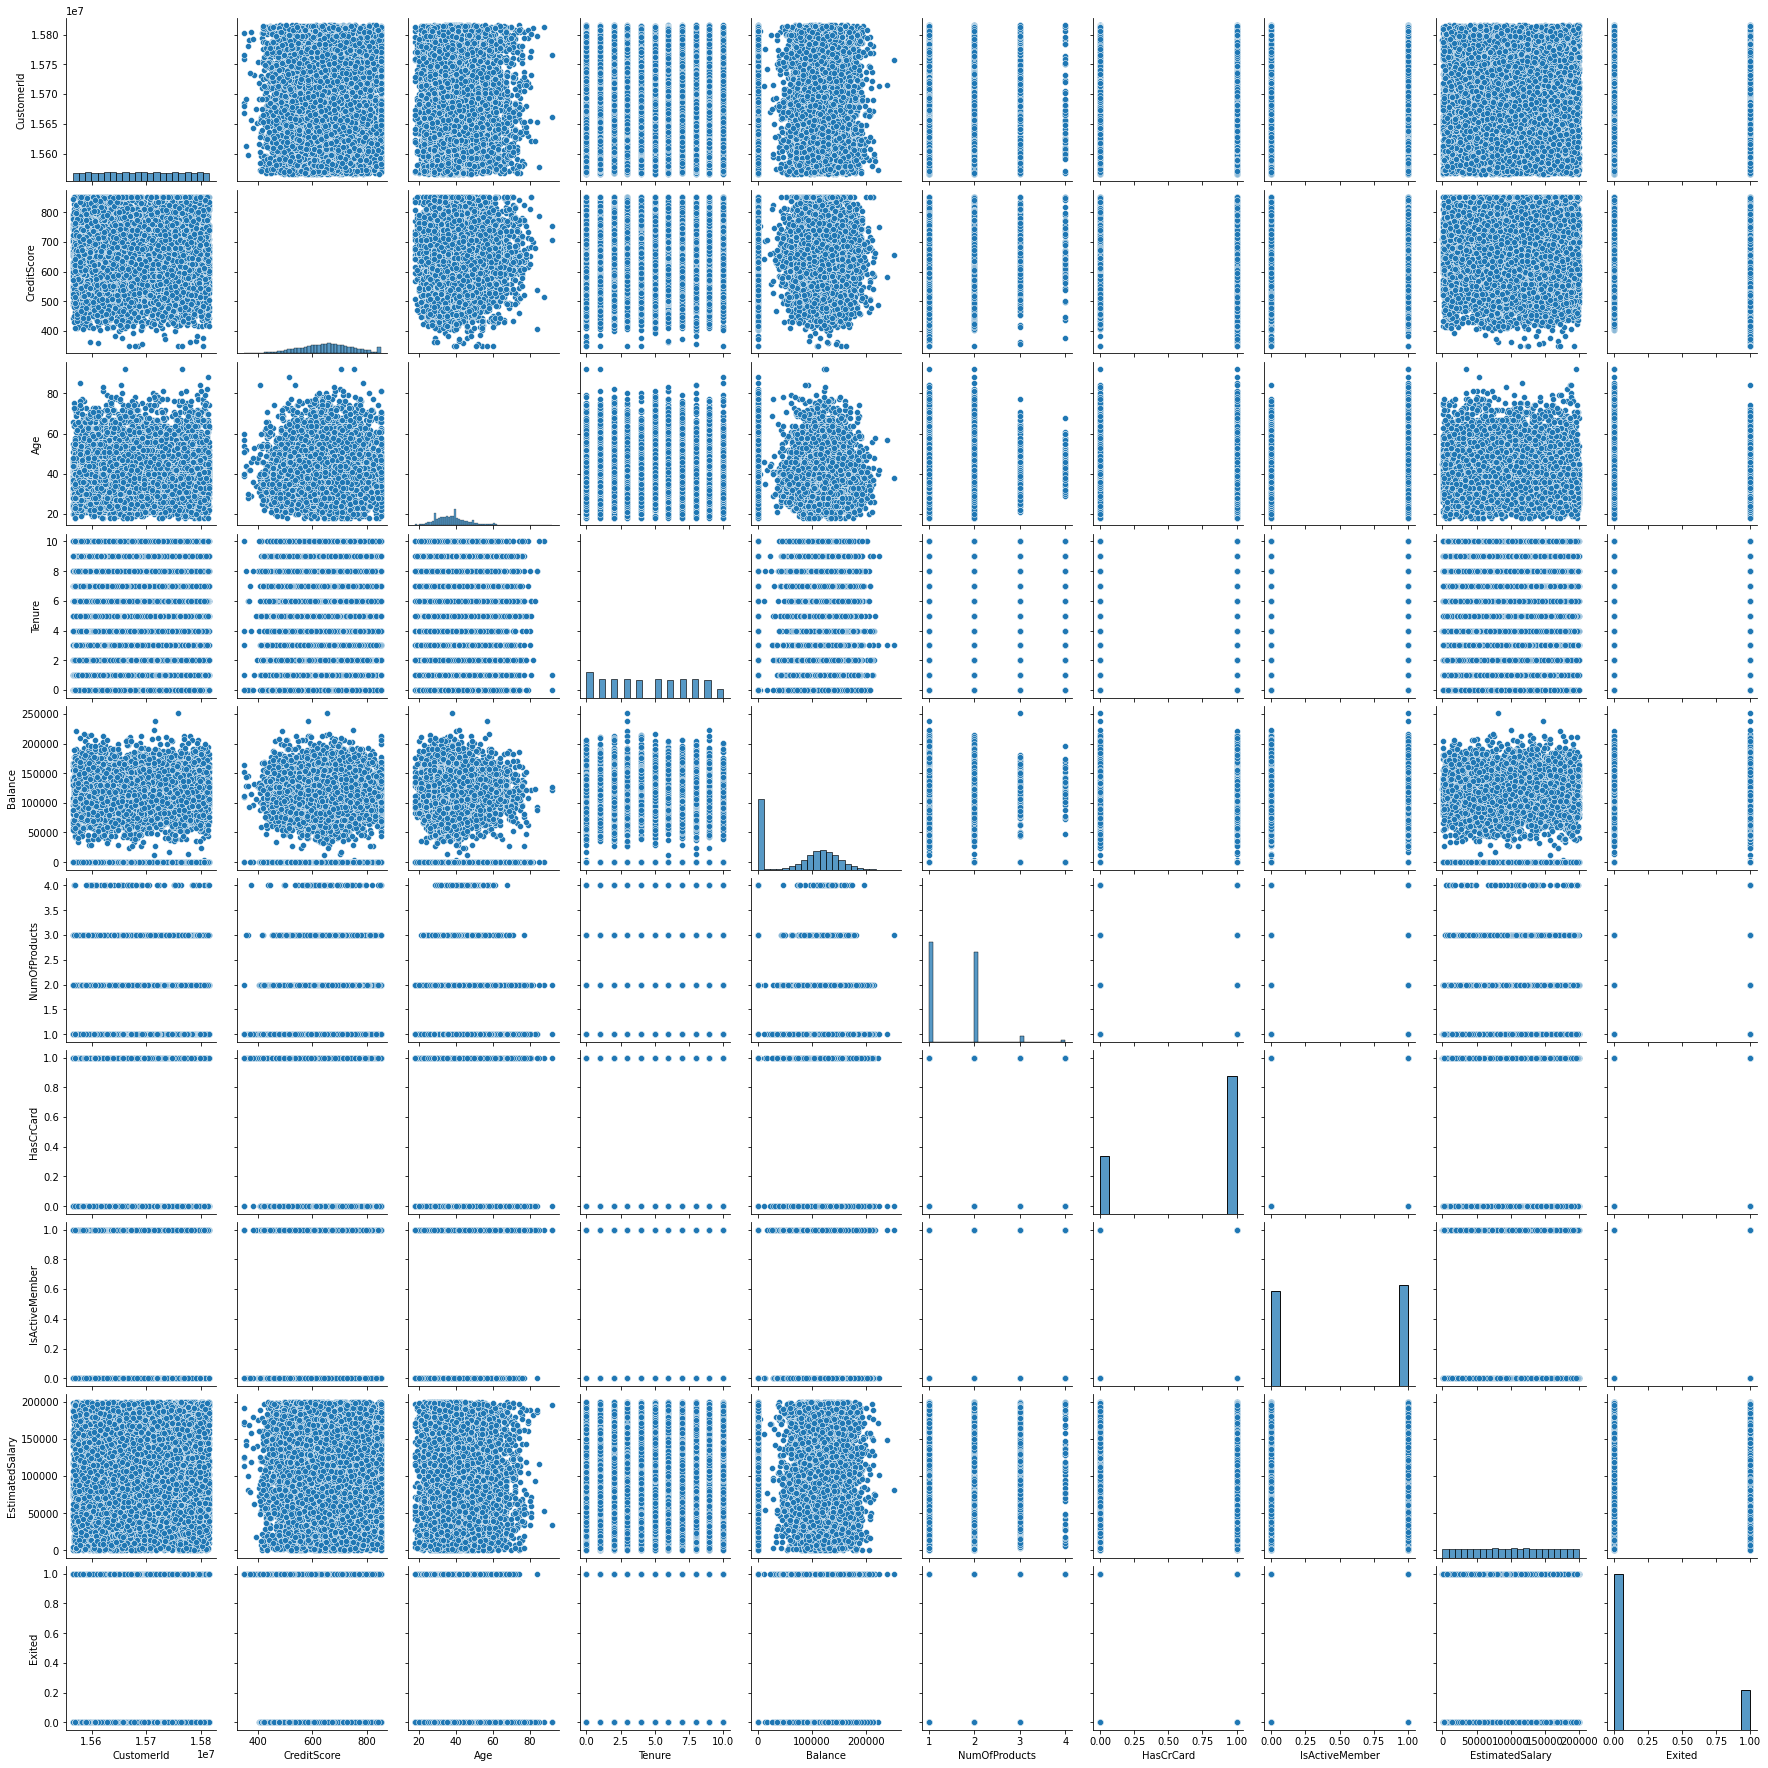

In [11]:
sns.pairplot(data)

Взаимосвязей нет

In [12]:
OHE_data = pd.get_dummies(data, drop_first=True)
OHE_data.head() # one hot codding, категории переведены в классы в виде чисел

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
features = OHE_data.drop(['Exited'], axis=1)
target = OHE_data['Exited']#реазделение признаков и целевого

In [14]:
# разделение данных на выборки: тестовая, обучающая, валидационная
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)


print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)#узнаем размеры выборок

(5625, 12)
(1875, 12)
(2500, 12)
(5625,)
(1875,)
(2500,)


In [15]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()# масштабируем признаки
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_138/3025465693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Теперь данные подготовлены

## Исследование задачи

In [16]:
data['Exited'].value_counts(normalize= True) # проверяем сбалансированность

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Находим дисбаланс

## Борьба с дисбалансом

### Logistic Regression

In [17]:
model_LR = LogisticRegression(random_state=12345, solver='liblinear')
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

proba_valid = model_LR.predict_proba(features_valid)
proba_one_valid = proba_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, proba_one_valid))

F1: 0.0
AUC ROC: 0.5149973596197852


### Decision Tree Classifier

In [18]:
model_DT = DecisionTreeClassifier(random_state=12345)
model_DT.fit(features_train, target_train)
predicted_valid = model_DT.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
proba_valid = model_DT.predict_proba(features_valid)
proba_one_valid = proba_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, proba_one_valid))

F1: 0.5142857142857142
AUC ROC: 0.699458722055976


In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=12345)

In [20]:
parameters = {'max_depth': range(1, 50)}#перебор параметров
GS = GridSearchCV(DecisionTreeClassifier(random_state=12345), parameters, cv=cv, scoring='f1')
GS.fit(features_train, target_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8}
0.5502853314659394


### Random Forest

In [21]:
model_RF = RandomForestClassifier(random_state=12345)
model_RF.fit(features_train, target_train)       
predictions = model_RF.predict(features_train)
predicted_valid = model_RF.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

proba_valid = model_RF.predict_proba(features_valid)
proba_one_valid = proba_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, proba_one_valid))

F1: 0.5766666666666668
AUC ROC: 0.8608026755852841


In [22]:
parameters = {'max_depth': [3, 4, 6, 10, 14, 21], 'n_estimators' : range(1, 50)}
GS = GridSearchCV(RandomForestClassifier(random_state=12345), parameters, cv=cv, scoring='f1')
GS.fit(features_train, target_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 21, 'n_estimators': 33}
0.5706218522623894


Есть большой дисбаланс, который нужно исправить. И уже с исправлиным балансом данных проверить наши модели

In [23]:
def upsample(features, target, repeat): #балансирование
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


features_zeros = features_upsampled[target_upsampled == 0]
features_ones = features_upsampled[target_upsampled == 1]
target_zeros = features_upsampled[target_upsampled == 0]
target_ones = features_upsampled[target_upsampled == 1]

print(features_zeros.shape[0])
print(features_ones.shape[0])

4503
4488


In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


features_zeros = features_downsampled[target_downsampled == 0]
features_ones = features_downsampled[target_downsampled == 1]
target_zeros = features_downsampled[target_downsampled == 0]
target_ones = features_downsampled[target_downsampled == 1]

print(features_zeros.shape[0])
print(features_ones.shape[0])

1126
1122


### Logistic Regression

In [25]:
model_LR = LogisticRegression(random_state=12345, solver='liblinear') #upsample
model_LR.fit(features_upsampled, target_upsampled)
predicted_valid = model_LR.predict(features_valid)

probabilities_valid = model_LR.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.5149973596197852
F1: 0.0


In [26]:
model_LogisticRegression = LogisticRegression(random_state=12345,solver='liblinear')# downsample
model_LogisticRegression.fit(features_downsampled, target_downsampled)
predicted_valid = model_LogisticRegression.predict(features_valid)

probabilities_valid = model_LogisticRegression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.5149973596197852
F1: 0.0


### Decision Tree

In [27]:
model_DT = DecisionTreeClassifier(random_state=12345) #upsample
model_DT.fit(features_upsampled, target_upsampled)
predicted_valid = model_DT.predict(features_valid)

probabilities_valid = model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.7002596373877839
F1: 0.5200517464424321


In [28]:
model_DT = DecisionTreeClassifier(random_state=12345) #downsample
model_DT.fit(features_downsampled, target_downsampled)
predicted_valid = model_DT.predict(features_valid)

probabilities_valid = model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.6834888223904242
F1: 0.46560846560846564


In [29]:
for depth in range(1, 25): #нахождение лучшего параметра
    model_DT = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_DT.fit(features_upsampled, target_upsampled)
    predictions = model_DT.predict(features_train)
    scores = cross_val_score(model_DT, features_train, target_train, cv=cv, scoring='f1').mean()   
    print("max_depth =", depth, ":")
    print("Результат проверки на обучающей  выборке", f1_score(target_train, predictions))
    predictions = model_DT.predict(features_valid)
    print("Результат проверки на валидационной выборке", f1_score(target_valid, predictions))
    print("Результат проверки при кросс-валидации", scores)
    print()

max_depth = 1 :
Результат проверки на обучающей  выборке 0.47421253028729665
Результат проверки на валидационной выборке 0.4944723618090453
Результат проверки при кросс-валидации 0.039705882352941174

max_depth = 2 :
Результат проверки на обучающей  выборке 0.5026954177897573
Результат проверки на валидационной выборке 0.5171400587659157
Результат проверки при кросс-валидации 0.4420982055612943

max_depth = 3 :
Результат проверки на обучающей  выборке 0.5030343897505057
Результат проверки на валидационной выборке 0.5171400587659157
Результат проверки при кросс-валидации 0.4429990412228285

max_depth = 4 :
Результат проверки на обучающей  выборке 0.5409181636726547
Результат проверки на валидационной выборке 0.5477338476374157
Результат проверки при кросс-валидации 0.5055090887341415

max_depth = 5 :
Результат проверки на обучающей  выборке 0.5563316125113879
Результат проверки на валидационной выборке 0.5556544968833482
Результат проверки при кросс-валидации 0.5323640476514117

max_dep

In [58]:
model_DT = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_DT.fit(features_upsampled, target_upsampled)
predictions_valid_DT = model_DT.predict(features_valid)

probabilities_valid = model_DT.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predictions_valid_DT))

AUC ROC: 0.8425145220911812
F1: 0.572265625


переобучение модели из-за большого кол-ва деревьев. Поотому что видна скачущая разница между результатами проверки на обучающей и валидационной. Изменила параметры с 6 на 8, так как там результаты на всех проверках усредненно выше

### Random Forest 

In [32]:
model_RF = RandomForestClassifier(random_state=12345)
model_RF.fit(features_upsampled, target_upsampled)       
predictions = model_RF.predict(features_train)
predicted_valid = model_RF.predict(features_valid)

probabilities_valid = model_RF.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print(f1_score(target_valid, predicted_valid))

AUC ROC: 0.8604207005808836
0.5850746268656717


In [77]:
for est in range(15, 35): 
    model_RF = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=est)
    model_RF.fit(features_upsampled, target_upsampled)       
    predictions = model_RF.predict(features_train)
    scores = cross_val_score(model_RF, features_train, target_train, cv=cv, scoring='f1').mean()   
    print("n_estimators =", est, ": ")
    print("Результат проверки на обучающей  выборке", f1_score(target_train, predictions))
    predictions = model_RF.predict(features_valid)
    print("Результат проверки на валидационной выборке", f1_score(target_valid, predictions))
    print("Результат проверки при кросс-валидации", scores)
    print()

n_estimators = 15 : 
Результат проверки на обучающей  выборке 0.8064899089829838
Результат проверки на валидационной выборке 0.6064981949458483
Результат проверки при кросс-валидации 0.5435770421656241

n_estimators = 16 : 
Результат проверки на обучающей  выборке 0.8074484944532488
Результат проверки на валидационной выборке 0.6144578313253012
Результат проверки при кросс-валидации 0.5445373395503639

n_estimators = 17 : 
Результат проверки на обучающей  выборке 0.8111776447105788
Результат проверки на валидационной выборке 0.6235011990407675
Результат проверки при кросс-валидации 0.5446429364935899

n_estimators = 18 : 
Результат проверки на обучающей  выборке 0.8110709987966306
Результат проверки на валидационной выборке 0.6214285714285716
Результат проверки при кросс-валидации 0.5394422649619608

n_estimators = 19 : 
Результат проверки на обучающей  выборке 0.8198957079823506
Результат проверки на валидационной выборке 0.6161137440758294
Результат проверки при кросс-валидации 0.536

In [82]:
model_RF = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=31)
model_RF.fit(features_upsampled, target_upsampled)
predictions_valid_RF = model_RF.predict(features_valid)

probabilities_valid = model_RF.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predictions_valid_RF))

AUC ROC: 0.8667030452385144
F1: 0.6209386281588447


#### Вывод

Выберем модель Random Forest, так как именно эта модель показала лучшие результаты и мы достигли F1 - 0.62, А нам нужно было не менее 0.59. Изменила параметры с 21 до 31. Так как результаты усредненно выше

## Тестирование модели

### Random Forest

In [83]:
predict_test_RF = model_RF.predict(features_test)
f1 = f1_score(target_test, predict_test_RF)
print(f1)

probabilities_test = model_RF.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.6226583407671723
0.8524624860288696


### Вывод

Для начала мы выгрузили данные и подготовили их. В подготовку входило запонение пропусков, проверка взаимосвязей, нахождение дубликатов, удаление ненужной информации, горячее кодирование, масштабирование данных. После чего нашли дисбаланс и провели обучение на этих данных несколько моделей и проанализировали. После чего сбалансировали и еще раз обучили на новых данных. По итоговым результатам можно сказать, что лучшие показатели у модели Random Forest. На валидационной 0.62, на тестовой 0.61. B качество 0.86 и 0.84. После мы улучшили результат метрик изменив гиперпараметр в модели Random Forest c 21 на 31

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*